In [45]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [2]:
base = pd.read_csv('../Data/BaseData.csv')
base.shape

(2580, 299)

In [3]:
Ridge = Ridge()

In [4]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [5]:
Ridge.fit(X,y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=6.67842e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge()

In [6]:
Ridge.score(X,y)

0.9380514840996903

In [8]:
len(Ridge.predict(X))

2580

In [9]:
Ridge_Results = Ridge.predict(X)

In [11]:
base_ordinal = pd.read_csv('../Data/BaseOrdinal.csv')
base_ordinal.shape

(2580, 83)

In [12]:
type(Ridge_Results)

numpy.ndarray

In [14]:
base_ordinal = base_ordinal.assign(Ridge = Ridge_Results)

In [15]:
base_ordinal.shape

(2580, 84)

In [48]:
base_ordinal.to_csv('Ordinal+Ridge.csv', index=False)

In [16]:
X_ordinal = base_ordinal.drop(['SalePrice'], axis=1).values
Y_ordinal = base_ordinal.SalePrice.values

In [17]:
X_ordinal.shape

(2580, 83)

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
gbm = GradientBoostingRegressor()
gbm.fit(X_train_scaled, Y_train)
GBM_Score = gbm.score(X_test_scaled, Y_test)

In [31]:
GBM_Score

0.9527936783009852

In [37]:
Scores = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    
    Scores.append(GBM_Score)

In [38]:
Positive = []
Negative = []

for i in Scores:
    if i < 0:
        Negative.append(i)
    else:
        Positive.append(i)

Median R2 is: 0.9429463075243332
Mean R2 is: 0.9373170815749363
Standard Deviation R2 is: 0.01685526660766725


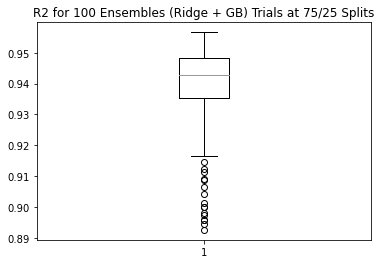

In [39]:
plt.boxplot(Positive)
plt.title('R2 for 100 Ensembles (Ridge + GB) Trials at 75/25 Splits')
print("Median R2 is: " + str(statistics.median(Positive)))
print("Mean R2 is: " + str(statistics.mean(Positive)))
print("Standard Deviation R2 is: " + str(statistics.stdev(Positive)))

In [40]:
print("Number of times results produced Negative R2: " + str((len(Negative))))

Number of times results produced Negative R2: 0


In [41]:
Negative

[]

In [42]:
df = pd.DataFrame(Positive, columns=['Ensemble: Ridge + GB'])
df.to_csv('Ensemble_R_GB_Scores.csv', index=False)